In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import random

Training dataset dimensions:  (7500, 784)
Number of training labels:  7500
Testing dataset dimensions:  (1000, 784)
Number of testing labels:  1000


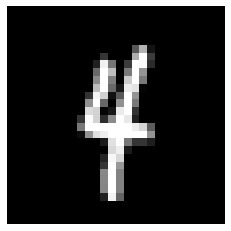

Label 4


In [2]:
## USING THE DATA LOADING CELLS FROM THE MNIST NOTEBOOK

## Load the training set
train_data = np.load('data/train_data.npy')
train_labels = np.load('data/train_labels.npy')

## Load the testing set
test_data = np.load('data/test_data.npy')
test_labels = np.load('data/test_labels.npy')

print("Training dataset dimensions: ", np.shape(train_data))
print("Number of training labels: ", len(train_labels))
print("Testing dataset dimensions: ", np.shape(test_data))
print("Number of testing labels: ", len(test_labels))

def show_digit(x):
    plt.axis('off')
    plt.imshow(x.reshape((28,28)), cmap=plt.cm.gray)
    plt.show()
    return

## Define a function that takes an index into a particular data set ("train" or "test") and displays that image.
def vis_image(index, dataset="train"):
    if(dataset=="train"): 
        show_digit(train_data[index,:])
        label = train_labels[index]
    else:
        show_digit(test_data[index,:])
        label = test_labels[index]
    print("Label " + str(label))
    return
vis_image(90,"train")

2703.074701106771
2573.7747380533856
3029.8337228190103
2592.446751302083
2496.614274983724
2737.11185016276
2728.364704199219
2652.921812141927
2749.3498712890623
3123.6890631835936
2897.4916544921875
2519.7794092447916
2407.4658693929036
2407.768803857422
2537.4057421875
2647.8082947265625
2660.06268992513
2518.3048650553387
2435.318482788086
2336.0628544840497
1911.2247543863932
1971.1580364420572
2002.851360498047
2023.4743989176432
2040.8926248046876
2056.916211360677
2070.3527720784505
2085.3000048502604
2097.6291396402994
2106.6455065917967


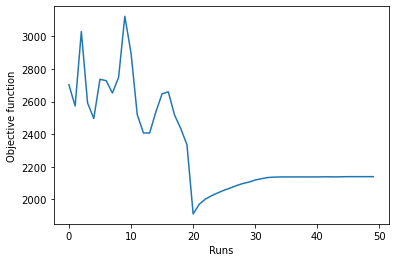

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.0000

In [60]:
import sys


def kmeans(n,k):
    # To get the same results each time
    np.random.seed(10)
    # To get a better view of the array
    np.set_printoptions(threshold=sys.maxsize)

    # Randomly selecting indexes from the dataset
    idx = np.random.choice(n, size = k, replace=False)

    # Get the actual data from training set
    centroids_random = train_data[idx, :] #Step 1

    no_of_iterations = 30

    # Finding the distance between training examples and each centroid
    distances = np.zeros((n,k))
    objective_function = []
    obj_min = []
    obj_max = []

    for i in range(len(centroids_random)):
        distances[:,i] = ((train_data-centroids_random[i])**2).sum(axis=1)**0.5
        objective_function.append(distances[:,i].mean(axis=0))
        closest = np.argmin(distances,axis=1) 


    # closest and points are the same
    for iter in range(no_of_iterations): 
            centroids = []

            for idx in range(k):
                centroid = train_data[closest==idx].mean(axis=0) 
                centroids.append(centroid)

            # Update centroids
            centroids = np.vstack(centroids) 
            # New assignment of distances
            for i in range(len(centroids)):
                distances[:,i] = ((train_data-centroids[i])**2).sum(axis=1)**0.5
                closest = np.argmin(distances,axis=1)

            objective_function.append(distances[:,i].mean(axis=0))
            obj_min.append(distances[:,i].min())
            obj_max.append(distances[:,i].max())

            print(objective_function[iter])

    return closest, centroids, objective_function

closest, centroids, objective_function = kmeans(train_data.shape[0],20)

plt.plot(range(len(objective_function)),objective_function)
plt.xlabel("Runs")
plt.ylabel("Objective function")
#plt.savefig('objectiveK5it10.png')
plt.show()

'''''
plt.plot(range(len(obj_min)),obj_min)
plt.xlabel("Runs")
plt.ylabel("Objective function min")
#plt.savefig('minK5it10.png')
plt.show()

plt.plot(range(len(obj_max)),obj_max)
plt.xlabel("Runs")
plt.ylabel("Objective function max")
#plt.savefig('maxK5it10.png')
plt.show()
'''''
print(centroids)

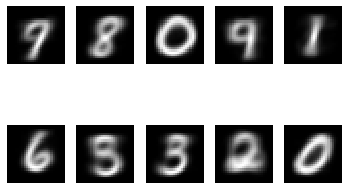

In [56]:
## THIS CELL FOR PLOTTING
fig, axs = plt.subplots(2, 5)
plt.gray()

for i, ax in enumerate(axs.flat):
    ax.matshow(centroids[i,:].reshape(28,28))
    ax.axis('off')

#plt.savefig('K5iter10centroids.png')   
